In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Use scikit-learn's built-in *make_classification* method to generate syntehtic classificiation data

In [2]:
from sklearn.datasets import make_classification

#### I used two informative features (Temp, Humidity) and one redundant feature 'Crime'

In [3]:
X,y = make_classification(n_samples=35040,n_classes=2,n_features=3,n_informative=2,n_redundant=1,
                           weights=[0.999,0.001],class_sep=1.0)

In [4]:
df=pd.DataFrame(data=X,columns=['Temp','Humidity','Crime'])

In [5]:
df['y']=y

In [6]:
df['Temp']=df['Temp']-min(df['Temp'])
maxt=max(df['Temp'])
df['Temp']=90*df['Temp']/maxt

In [7]:
df['Humidity']=df['Humidity']-min(df['Humidity'])
maxh=max(df['Humidity'])
df['Humidity']=100*df['Humidity']/maxh

In [8]:
df['Crime']=df['Crime']-min(df['Crime'])
maxc=max(df['Crime'])
df['Crime']=10*df['Crime']/maxc

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

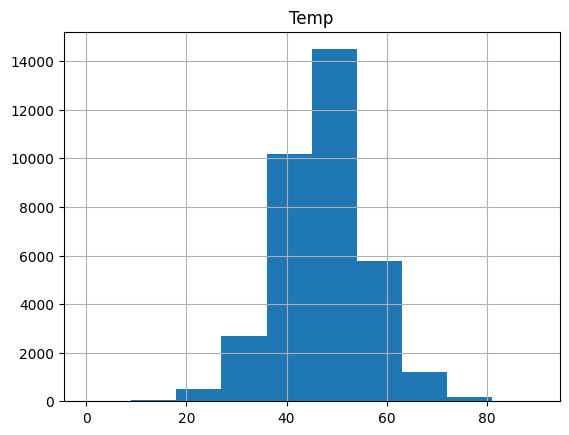

In [9]:
df.hist('Temp')

array([[<AxesSubplot:title={'center':'Humidity'}>]], dtype=object)

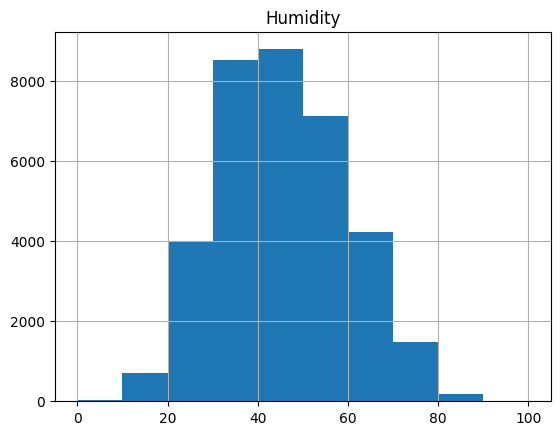

In [10]:
df.hist('Humidity')

array([[<AxesSubplot:title={'center':'Crime'}>]], dtype=object)

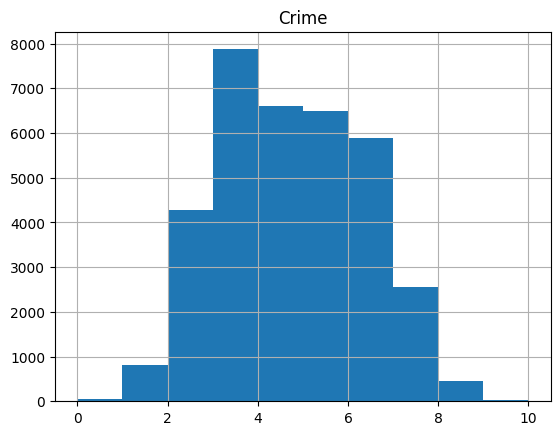

In [11]:
df.hist('Crime')

### Take a sum on the Boolean array with df['y']==1 to count the number of positive examples

In [12]:
sum(df['y']==1)

222

**That means only 223 responses out of 35040 samples are positive**

In [13]:
df.head(10)

,Temp,Humidity,Crime,y
0,55.452527,71.240909,2.177549,1
1,42.869532,18.680086,7.844058,0
2,39.653568,44.533462,4.123107,0
3,32.033880,48.155374,2.890082,0
4,60.042084,56.393878,4.586701,0
5,51.057928,22.326440,8.177216,0
6,52.898890,61.910797,3.151645,0
7,44.526665,17.346598,8.184030,0
8,45.481331,56.695755,3.101415,0
9,45.785079,30.482640,6.580579,0


In [14]:
df.describe()

,Temp,Humidity,Crime,y
count,35040.000000,35040.000000,35040.000000,35040.000000
mean,47.306370,45.545698,4.749678,0.006336
std,8.824160,14.027428,1.597110,0.079345
min,0.000000,0.000000,0.000000,0.000000
25%,41.895085,35.129794,3.464625,0.000000
50%,47.344412,44.610094,4.658097,0.000000
75%,52.741306,55.643195,6.024603,0.000000
max,90.000000,100.000000,10.000000,1.000000


## Logistic Regression Undersampling

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

### Under-sampling the negative class to limited number

In [16]:
df0=df[df['y']==0].sample(800)
df1=df[df['y']==1]
df_balanced = pd.concat([df0,df1],axis=0)
df_balanced.describe()

,Temp,Humidity,Crime,y
count,1022.000000,1022.000000,1022.000000,1022.000000
mean,47.480548,45.860101,4.725602,0.217221
std,9.723770,14.296301,1.625427,0.412556
min,18.727214,0.000000,0.684976,0.000000
25%,41.532536,35.780836,3.479217,0.000000
50%,47.258809,45.107024,4.547533,0.000000
75%,53.178648,55.069218,5.944517,0.000000
max,90.000000,93.295871,9.421796,1.000000


Text(0.5, 1.0, 'Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset')

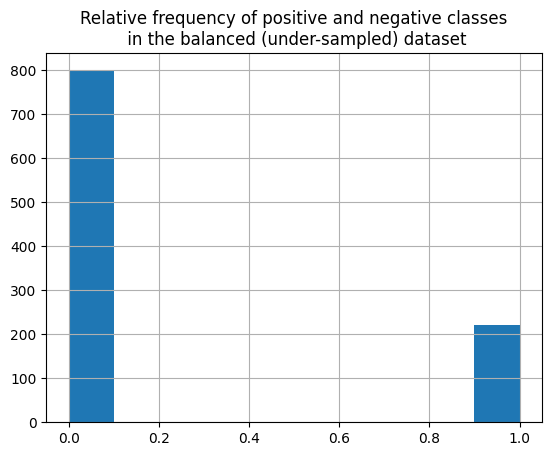

In [17]:
df_balanced.hist('y')
plt.title("Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset")

In [18]:
log_model_balanced = LogisticRegressionCV(cv=5,class_weight='balanced')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y',axis=1), 
                                                    df_balanced['y'], test_size=0.30)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
log_model_balanced.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=5)

In [24]:
print(classification_report(y_test,log_model_balanced.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.21      1.00      0.35        64

    accuracy                           0.21       307
   macro avg       0.10      0.50      0.17       307
weighted avg       0.04      0.21      0.07       307



c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: U

### How the degree of under-sampling affects _F1-score_, _precision_, and _recall_

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
n_neg = [i for i in range(200,4200,200)]

df1=df[df['y']==1]
F1_scores=[]
precision_scores=[]
recall_scores=[]

for num in n_neg:
    # Create under-sampled data sets
    df0=df[df['y']==0].sample(num)
    df_balanced = pd.concat([df0,df1],axis=0)
    # Create model with 'class_weight=balanced' and 5-fold cross-validation
    log_models=LogisticRegressionCV(cv=5,class_weight='balanced')
    # Create test/train splits
    X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y',axis=1), 
                                                    df_balanced['y'], test_size=0.30)
    # Min-max scale the training data
    X_train = scaler.fit_transform(X_train)
    
    # Fit the logistic regression model
    log_models.fit(X_train,y_train)
    
    # Calculate various scores
    F1_scores.append(f1_score(y_test,log_models.predict(X_test)))
    precision_scores.append(precision_score(y_test,log_models.predict(X_test)))
    recall_scores.append(recall_score(y_test,log_models.predict(X_test)))

Text(0.5, 0, 'Number of negative samples')

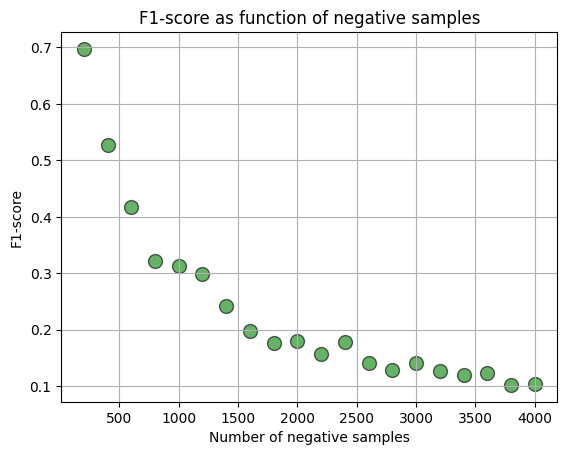

In [27]:
plt.scatter(n_neg,F1_scores,color='green',edgecolor='black',alpha=0.6,s=100)
plt.title("F1-score as function of negative samples")
plt.grid(True)
plt.ylabel("F1-score")
plt.xlabel("Number of negative samples")

Text(0.5, 0, 'Number of negative samples')

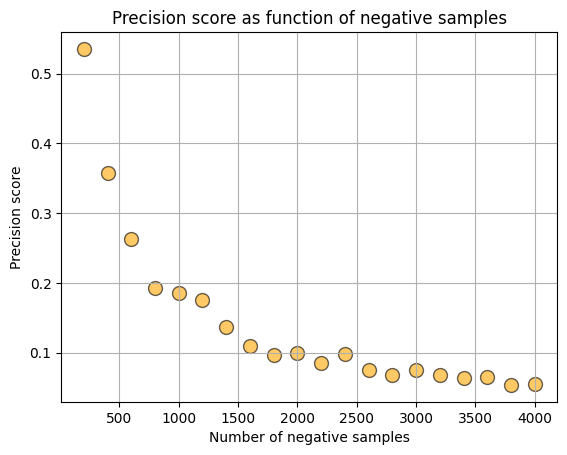

In [28]:
plt.scatter(n_neg,precision_scores,color='orange',edgecolor='black',alpha=0.6,s=100)
plt.title("Precision score as function of negative samples")
plt.grid(True)
plt.ylabel("Precision score")
plt.xlabel("Number of negative samples")

Text(0.5, 0, 'Number of negative samples')

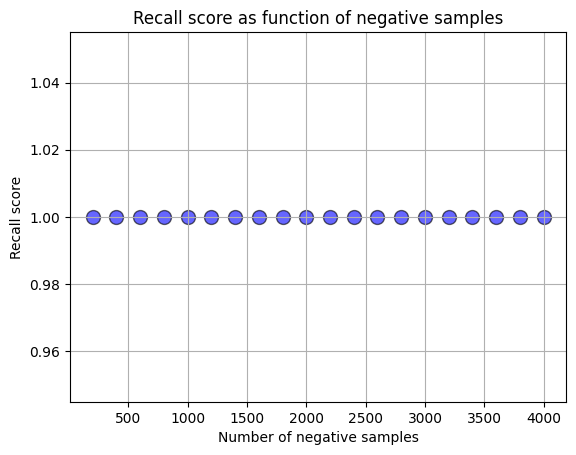

In [29]:
plt.scatter(n_neg,recall_scores,color='blue',edgecolor='black',alpha=0.6,s=100)
plt.title("Recall score as function of negative samples")
plt.grid(True)
plt.ylabel("Recall score")
plt.xlabel("Number of negative samples")

#### So, precision goes down rapidly with more negative samples and so does F1-score. Recall is largely unaffected by mixing negative samples with the positive ones.